In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The file is "UnicodeDecodeError" I have to fix it
# crime = pd.read_csv("crime.csv")

In [3]:
# fixing the error by adding the "encoding='latin'" param in the file pd.read_csv func.
crime = pd.read_csv("crime.csv", encoding="latin")

In [4]:
# print the head
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [5]:
# finding info about the file
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

## The data above shows that there are some missing data in column like "shooting", "district", "street", etc

In [6]:
# describing the data
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


## Dropping unuseful columns in our context

In [7]:
# print all the columns in order to have a better view of all the column names
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [8]:
# drop "INCIDENT_NUMBER" 
crime.drop("INCIDENT_NUMBER", axis = 1, inplace = True)

In [9]:
# drop "OFFENSE_DESCRIPTION" 
crime.drop("OFFENSE_DESCRIPTION", axis = 1, inplace = True)

In [10]:
# drop "SHOOTING" 
crime.drop("SHOOTING", axis = 1, inplace = True)

In [11]:
crime.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,619,Larceny,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,1402,Vandalism,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,3410,Towed,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,3114,Investigate Property,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,3114,Investigate Property,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [12]:
# repalce all the NaN in the data with 0
crime.fillna(0, inplace=True)

In [13]:
# cofirm/check if all the data is clean
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OFFENSE_CODE        319073 non-null  int64  
 1   OFFENSE_CODE_GROUP  319073 non-null  object 
 2   DISTRICT            319073 non-null  object 
 3   REPORTING_AREA      319073 non-null  object 
 4   OCCURRED_ON_DATE    319073 non-null  object 
 5   YEAR                319073 non-null  int64  
 6   MONTH               319073 non-null  int64  
 7   DAY_OF_WEEK         319073 non-null  object 
 8   HOUR                319073 non-null  int64  
 9   UCR_PART            319073 non-null  object 
 10  STREET              319073 non-null  object 
 11  Lat                 319073 non-null  float64
 12  Long                319073 non-null  float64
 13  Location            319073 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 34.1+ MB


## Yes! it is clean ;)

# Now I will convert the date into actual date that pandas will uderstand

In [14]:
crimeDate = crime

In [15]:
# # convert the date
crimeDate["OCCURRED_ON_DATE"] = pd.to_datetime(crime["OCCURRED_ON_DATE"])

In [16]:
# print the converted the date
crimeDate["OCCURRED_ON_DATE"]

0        2018-09-02 13:00:00
1        2018-08-21 00:00:00
2        2018-09-03 19:27:00
3        2018-09-03 21:16:00
4        2018-09-03 21:05:00
                 ...        
319068   2016-06-05 17:25:00
319069   2015-07-09 13:38:00
319070   2015-07-09 13:38:00
319071   2016-05-31 19:35:00
319072   2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 319073, dtype: datetime64[ns]

In [17]:
# I will use "dt.time" to grab the time, since that's what am interested in
crimeDate["OCCURRED_ON_DATE"] = crime["OCCURRED_ON_DATE"].dt.time

In [18]:
# assign the crime value to crimeTime
crimeTime = crime["OCCURRED_ON_DATE"]

In [19]:
# print the time
crimeTime

0         13:00:00
1         00:00:00
2         19:27:00
3         21:16:00
4         21:05:00
            ...   
319068    17:25:00
319069    13:38:00
319070    13:38:00
319071    19:35:00
319072    00:12:00
Name: OCCURRED_ON_DATE, Length: 319073, dtype: object

In [20]:
# create a new column for time in the dataset
crime['TIME'] = crimeTime

In [21]:
# confirm the "TIME" col is added 
crime.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,TIME
0,619,Larceny,D14,808,13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",13:00:00
1,1402,Vandalism,C11,347,00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",00:00:00
2,3410,Towed,D4,151,19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",19:27:00
3,3114,Investigate Property,D4,272,21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",21:16:00
4,3114,Investigate Property,B3,421,21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",21:05:00


## Yes! it is added ;)
# Now I will delete "OCCURRED_ON_DATE", since the "YEAR", "DAY_OF_WEEK", and "TIME" is included in the data now

In [22]:
# drop the "OCCURRED_ON_DATE"
crime.drop("OCCURRED_ON_DATE", axis = 1, inplace = True)

In [23]:
# print the head
crime.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,TIME
0,619,Larceny,D14,808,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",13:00:00
1,1402,Vandalism,C11,347,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",00:00:00
2,3410,Towed,D4,151,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",19:27:00
3,3114,Investigate Property,D4,272,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",21:16:00
4,3114,Investigate Property,B3,421,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",21:05:00


## Visualizing the data

In [24]:
# again print all the column names
crime.columns

Index(['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'DISTRICT', 'REPORTING_AREA',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location', 'TIME'],
      dtype='object')

Text(0.5, 1.0, 'Crime Rate Per Year')

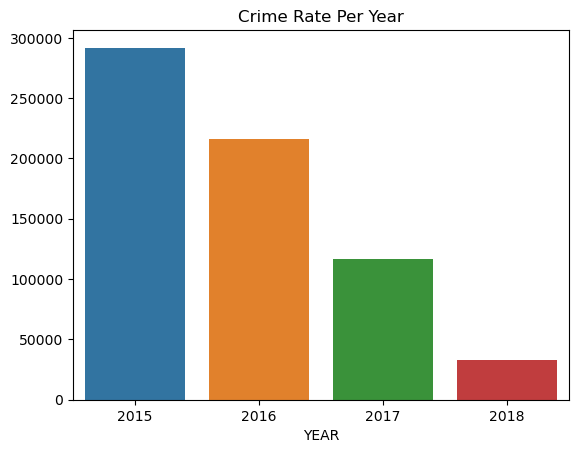

In [25]:
# I am trying to find in which year there was more crime, I use ci=False to disable the confidence intervals
sns.barplot(data=crime, x="YEAR", y=crime.index, ci=False).set_title("Crime Rate Per Year")

Text(0.5, 1.0, 'Crime Rate Per Hour')

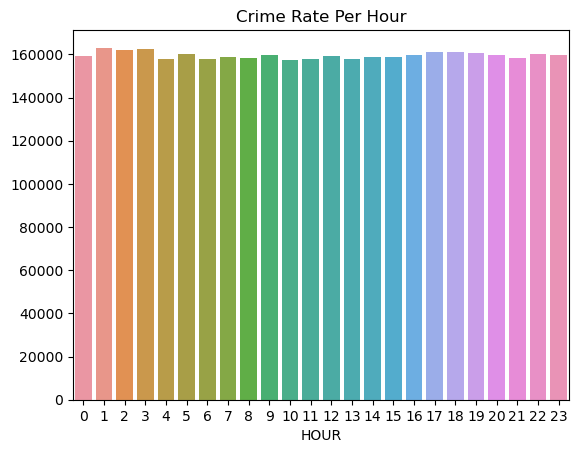

In [26]:
# I am trying to find at which time there was more crime, I use ci=False to disable the confidence intervals
sns.barplot(data=crime, x="HOUR", y=crime.index, ci=False).set_title("Crime Rate Per Hour")

Text(0.5, 1.0, 'Crime Rate Per Hour')

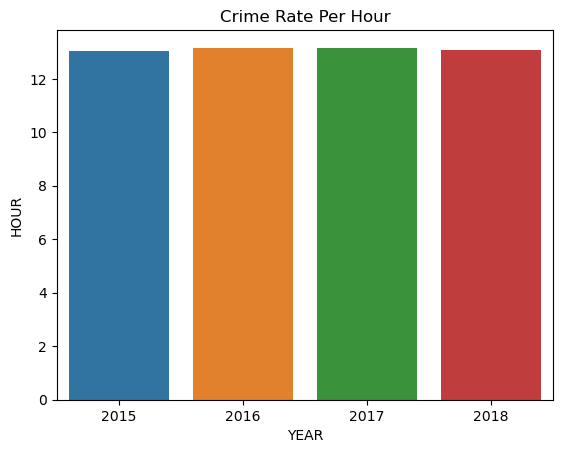

In [27]:
# I am trying to find at which hour there was more crime, I use ci=False to disable the confidence intervals
sns.barplot(x=crime.YEAR, y=crime.HOUR, ci=False).set_title("Crime Rate Per Hour")

In [28]:
# finding the days in which crimes occur most
crimeDays = pd.get_dummies(crime['DAY_OF_WEEK'])

In [29]:
crimeDays

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
319068,0,0,0,1,0,0,0
319069,0,0,0,0,1,0,0
319070,0,0,0,0,1,0,0
319071,0,0,0,0,0,1,0


Text(0.5, 1.0, 'Days In Which Crimes Occur The Most')

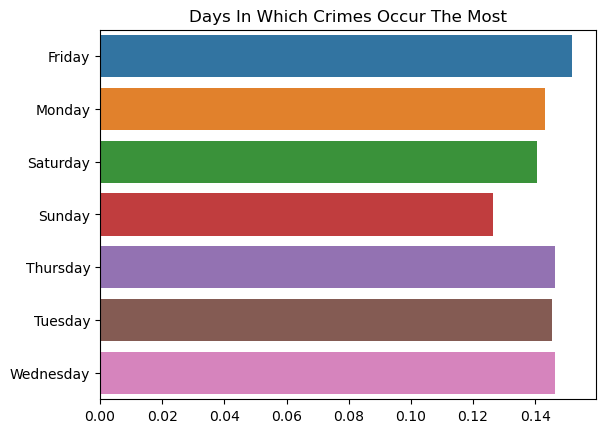

In [30]:
# I am trying to find in which day crimes occur most 
sns.barplot(data = crimeDays, ci = False, orient = "h").set_title("days in which crimes occur the most".title())

Text(0.5, 1.0, 'Months In Which Crimes Occur The Most')

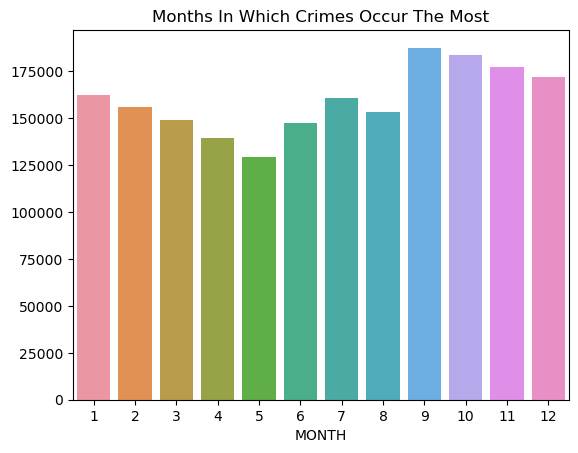

In [31]:
# I am trying to find in which month there was more crime, I use ci=False to disable the confidence intervals
sns.barplot(x=crime.MONTH, y=crime.index, ci=False).set_title("months in which crimes occur the most".title())

In [32]:
# Trying to find in which area the crimes occurs the most
crimeType = pd.get_dummies(crime["OFFENSE_CODE_GROUP"])

In [33]:
crimeType

,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,Bomb Hoax,Burglary - No Property Taken,...,Restraining Order Violations,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
319069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
319071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'How The Crime Data Is Correlated')

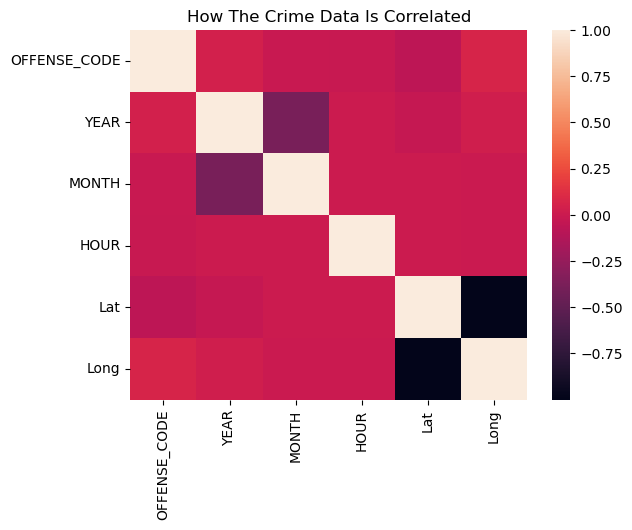

In [34]:
# Finding the correlation
sns.heatmap(data=crime.corr()).set_title("How The Crime Data Is Correlated")

# Preparing my data for Machine Learning

In [35]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OFFENSE_CODE        319073 non-null  int64  
 1   OFFENSE_CODE_GROUP  319073 non-null  object 
 2   DISTRICT            319073 non-null  object 
 3   REPORTING_AREA      319073 non-null  object 
 4   YEAR                319073 non-null  int64  
 5   MONTH               319073 non-null  int64  
 6   DAY_OF_WEEK         319073 non-null  object 
 7   HOUR                319073 non-null  int64  
 8   UCR_PART            319073 non-null  object 
 9   STREET              319073 non-null  object 
 10  Lat                 319073 non-null  float64
 11  Long                319073 non-null  float64
 12  Location            319073 non-null  object 
 13  TIME                319073 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 34.1+ MB


In [36]:
# Droping objects
crime.drop(["OFFENSE_CODE_GROUP","DISTRICT", "REPORTING_AREA", "UCR_PART", "STREET", "OFFENSE_CODE", "Lat", "Long"], axis = 1, inplace = True)

In [37]:
# Finding info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   YEAR         319073 non-null  int64 
 1   MONTH        319073 non-null  int64 
 2   DAY_OF_WEEK  319073 non-null  object
 3   HOUR         319073 non-null  int64 
 4   Location     319073 non-null  object
 5   TIME         319073 non-null  object
dtypes: int64(3), object(3)
memory usage: 14.6+ MB


In [38]:
# droping Time, etc.
crime.drop(["TIME", "Location", "DAY_OF_WEEK"], axis = 1, inplace = True)

In [39]:
# Finding info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   YEAR    319073 non-null  int64
 1   MONTH   319073 non-null  int64
 2   HOUR    319073 non-null  int64
dtypes: int64(3)
memory usage: 7.3 MB


In [40]:
crime["YEAR"].replace(0, crime["YEAR"].mean())
crime["MONTH"].replace(0, crime["MONTH"].mean())
crime["HOUR"].replace(0, crime["HOUR"].mean())

0         13.000000
1         13.118205
2         19.000000
3         21.000000
4         21.000000
            ...    
319068    17.000000
319069    13.000000
319070    13.000000
319071    19.000000
319072    13.118205
Name: HOUR, Length: 319073, dtype: float64

In [41]:
# Finding colmns
crime.columns

Index(['YEAR', 'MONTH', 'HOUR'], dtype='object')

In [42]:
#assiging values
X = crime[['YEAR', 'MONTH']]
y = crime['HOUR']

In [43]:
# importing packages
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lReg = LogisticRegression()

In [47]:
lReg.fit(X_train, y_train)

LogisticRegression()

In [48]:
dataPredictor = lReg.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,dataPredictor))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5994
           1       0.00      0.00      0.00      3723
           2       0.00      0.00      0.00      3115
           3       0.00      0.00      0.00      1847
           4       0.00      0.00      0.00      1408
           5       0.00      0.00      0.00      1344
           6       0.00      0.00      0.00      2026
           7       0.00      0.00      0.00      3422
           8       0.00      0.00      0.00      5291
           9       0.00      0.00      0.00      5833
          10       0.00      0.00      0.00      6631
          11       0.00      0.00      0.00      6528
          12       0.00      0.00      0.00      7517
          13       0.00      0.00      0.00      6713
          14       0.00      0.00      0.00      6824
          15       0.00      0.00      0.00      6498
          16       0.00      0.00      0.00      8071
          17       0.06    

/home/babu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/babu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/babu/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## *The above data is showing me that my algorithm is not perfomaing well, because the numeric data's are not uniform*

# crime days

In [53]:
X = crimeDays[[ "Friday","Monday", "Saturday", "Sunday", "Thursday", "Tuesday"]]
y = crimeDays["Wednesday"]

In [54]:
# importing packages
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lReg = LogisticRegression()

In [58]:
lReg.fit(X_train, y_train)

LogisticRegression()

In [59]:
dataPredictor = lReg.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,dataPredictor))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108976
           1       1.00      1.00      1.00     18654

    accuracy                           1.00    127630
   macro avg       1.00      1.00      1.00    127630
weighted avg       1.00      1.00      1.00    127630



# *The above data is showing me that my algorithm is perfomaing very well, because the numeric data are uniform*

# Report:

## The data shows that there is no significant change or drop of crime from 2015 to 2018. And data shows that there is more crime from october to december. And most crimes occur from 1:00 am to 3:00 am Therefore, my recomendation is to pay more attension to crimes from the beggining of October to the end of December.